# Датасет

Для решения задач используйте датасет, который мы создавали в теме «4.5. K-means. Практика»:

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

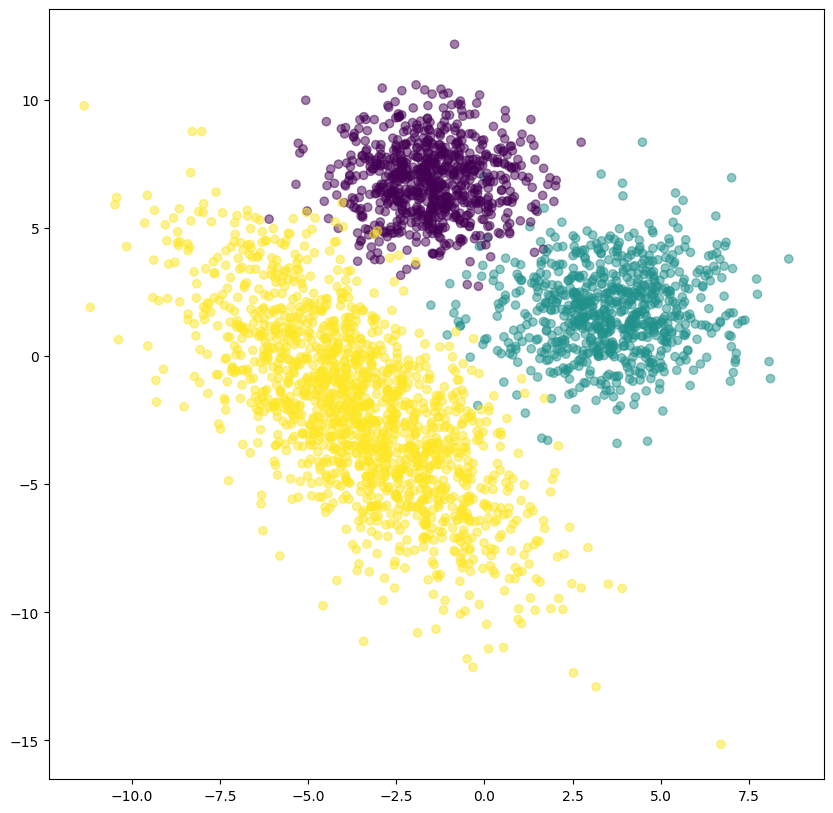

In [33]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Объект, который выполняет кластеризацию датасета с помощью EM-алгоритма, инициализируется так:

In [34]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)

В отличие от остальных рассматриваемых алгоритмов, EM-алгоритм лежит не в модуле cluster, а в модуле mixture. EM-алгоритм определяет смеси распределений в выборке, а не просто проводит кластеризацию.

Полный список параметров доступен в документации (англ.).

Для обучения модели GaussianMixture необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

In [35]:
gm.fit(X)

GaussianMixture(n_components=3, random_state=42)

Получить предсказания можно с помощью метода predict после метода fit:

In [36]:
gm.fit(X)
y_pred = gm.predict(X)

Можно совместить эти два шага при помощи метода fit_predict:

In [37]:
y_pred = gm.fit_predict(X)

Обучив, мы можем получить параметры распределений кластеров, например, средние:

In [38]:
means = gm.means_
means

array([[ 3.60809518,  1.73760829],
       [-1.50915711,  6.80752253],
       [-3.54551222, -2.12358327]])

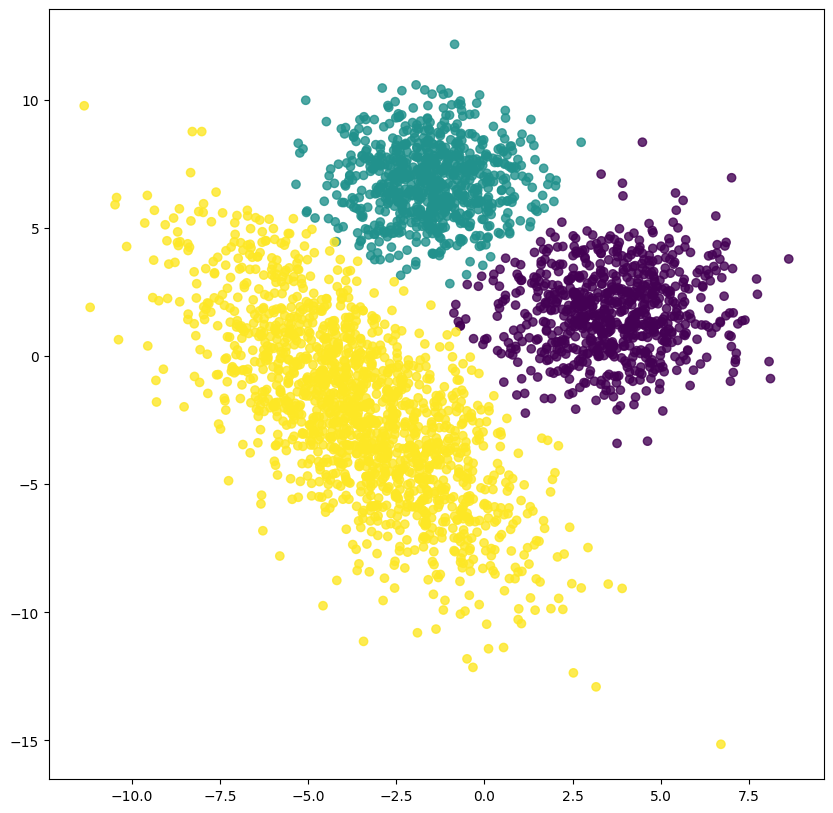

In [39]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.8)
plt.show()

In [40]:
print(np.round(means).astype(np.int_))

[[ 4  2]
 [-2  7]
 [-4 -2]]


In [46]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2], dtype=int64), array([ 744,  763, 1493], dtype=int64))

In [48]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 744, 1: 763, 2: 1493}